# Линейная алгебра: сходство текстов и аппроксимация функций

### Вы научитесь:
  * читать тексты из файла с помощью Python и разбивать их на слова
  * переводить тексты в векторные пространства, вычислять расстояния в этих пространствах
  * решать системы линейных уравнений
  * приближать любые функции с помощью многочленов
  
## Введение

В этом задании вы познакомитесь с некоторыми базовыми методами из линейной алгебры, реализованными в пакете SciPy — в частности, с методами подсчета косинусного расстояния и решения систем линейных уравнений. Так, на решении систем линейных уравнений основана настройка линейных моделей — очень большого и важного класса алгоритмов машинного обучения. Косинусное расстояние же часто используется в анализе текстов для измерения сходства между ними.

## Материалы

Справка по функциям пакета scipy.linalg: http://docs.scipy.org/doc/scipy/reference/linalg.html

Справка по работе с файлами в Python: https://docs.python.org/2/tutorial/inputoutput.html#reading-and-writing-files

Справка по регулярным выражениям в Python (если вы захотите узнать про них чуть больше): https://docs.python.org/2/library/re.html

## Задача 1: сравнение предложений

Дан набор предложений, скопированных с Википедии. Каждое из них имеет "кошачью тему" в одном из трех смыслов:

  * кошки (животные)
  * UNIX-утилита cat для вывода содержимого файлов
  * версии операционной системы OS X, названные в честь семейства кошачьих
Ваша задача — найти два предложения, которые ближе всего по смыслу к расположенному в самой первой строке. В качестве меры близости по смыслу мы будем использовать косинусное расстояние.

#### Выполните следующие шаги:

1. Скачайте файл с предложениями (sentences.txt).
2. Каждая строка в файле соответствует одному предложению. Считайте их, приведите каждую к нижнему регистру с помощью строковой функции lower().
3. Произведите токенизацию, то есть разбиение текстов на слова. Для этого можно воспользоваться регулярным выражением, которое считает разделителем любой символ, не являющийся буквой: re.split('[^a-z]', t). Не забудьте удалить пустые слова после разделения.
4. Составьте список всех слов, встречающихся в предложениях. Сопоставьте каждому слову индекс от нуля до (d - 1), где d — число различных слов в предложениях. Для этого удобно воспользоваться структурой dict.
5. Создайте матрицу размера n x d, где n — число предложений. Заполните ее: элемент с индексом (i, j) в этой матрице должен быть равен количеству вхождений j-го слова в i-е предложение. У вас должна получиться матрица размера 22 * 254.
6. Найдите косинусное расстояние от предложения в самой первой строке (In comparison to dogs, cats have not undergone...) до всех остальных с помощью функции scipy.spatial.distance.cosine. Какие номера у двух предложений, ближайших к нему по этому расстоянию (строки нумеруются с нуля)? Эти два числа и будут ответами на задание.
7. Совпадают ли ближайшие два предложения по тематике с первым? Совпадают ли тематики у следующих по близости предложений?

Разумеется, использованный вами метод крайне простой. Например, он не учитывает формы слов (так, cat и cats он считает разными словами, хотя по сути они означают одно и то же), не удаляет из текстов артикли и прочие ненужные слова.

In [1]:
import pandas as pd
import numpy as np
from scipy import spatial
import re

In [31]:
# ваш код
sentences = []
with open('sentences.txt', 'r') as file:
    for line in file:
        sentence = line.lower()
        sentence = [word for word in re.split('[^a-z]', sentence) if word]
        # print(sentence)
        sentences.append(sentence)

print(len(sentences))
sentences



22


[['in',
  'comparison',
  'to',
  'dogs',
  'cats',
  'have',
  'not',
  'undergone',
  'major',
  'changes',
  'during',
  'the',
  'domestication',
  'process'],
 ['as',
  'cat',
  'simply',
  'catenates',
  'streams',
  'of',
  'bytes',
  'it',
  'can',
  'be',
  'also',
  'used',
  'to',
  'concatenate',
  'binary',
  'files',
  'where',
  'it',
  'will',
  'just',
  'concatenate',
  'sequence',
  'of',
  'bytes'],
 ['a',
  'common',
  'interactive',
  'use',
  'of',
  'cat',
  'for',
  'a',
  'single',
  'file',
  'is',
  'to',
  'output',
  'the',
  'content',
  'of',
  'a',
  'file',
  'to',
  'standard',
  'output'],
 ['cats',
  'can',
  'hear',
  'sounds',
  'too',
  'faint',
  'or',
  'too',
  'high',
  'in',
  'frequency',
  'for',
  'human',
  'ears',
  'such',
  'as',
  'those',
  'made',
  'by',
  'mice',
  'and',
  'other',
  'small',
  'animals'],
 ['in',
  'one',
  'people',
  'deliberately',
  'tamed',
  'cats',
  'in',
  'a',
  'process',
  'of',
  'artificial',
  's

In [32]:
words = set(word for sentence in sentences for word in sentence)
words = list(words)

print(len(words))
words

254


['single',
 'clear',
 'error',
 'lines',
 'over',
 'fifth',
 'in',
 'both',
 'than',
 'any',
 'predecessor',
 'comparison',
 'organisms',
 'domestic',
 'also',
 'safer',
 'simply',
 'deliberately',
 'felis',
 'releasing',
 'firmware',
 'artificial',
 'for',
 'will',
 'possess',
 'started',
 'received',
 'no',
 'more',
 'offered',
 'concatenate',
 'of',
 'new',
 'or',
 'installed',
 'stdout',
 'lion',
 'stdin',
 'lb',
 'size',
 'mid',
 'sequence',
 'piped',
 't',
 'releases',
 'wild',
 'displays',
 'wrong',
 'domestication',
 'arguments',
 'predators',
 'pipes',
 'contains',
 'useful',
 'typically',
 'mice',
 'learned',
 'three',
 'you',
 'binary',
 'redirection',
 'ancestor',
 'small',
 'update',
 'genes',
 'people',
 'non',
 'features',
 'permanently',
 'allows',
 'redirected',
 'file',
 'if',
 'installation',
 'connected',
 'external',
 'those',
 'changes',
 'human',
 'most',
 'basic',
 'when',
 'the',
 'so',
 'chromosomes',
 'named',
 'an',
 'intel',
 'won',
 'too',
 'however',
 'fa

In [33]:
matrix = np.zeros((len(sentences), len(words)))
for i in range(len(sentences)):
    for word_i in range(len(words)):
        matrix[i, word_i] = sentences[i].count(words[word_i])

matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
distances = []
for i in range(len(sentences)):
    distance = spatial.distance.cosine(matrix[0], matrix[i])
    distances.append(distance)
    print(f'cosine-distance(0, {i}) = {distance}')

cosine-distance(0, 0) = 0.0
cosine-distance(0, 1) = 0.9527544408738466
cosine-distance(0, 2) = 0.8644738145642124
cosine-distance(0, 3) = 0.8951715163278082
cosine-distance(0, 4) = 0.7770887149698589
cosine-distance(0, 5) = 0.9402385695332803
cosine-distance(0, 6) = 0.7327387580875756
cosine-distance(0, 7) = 0.9258750683338899
cosine-distance(0, 8) = 0.8842724875284311
cosine-distance(0, 9) = 0.9055088817476932
cosine-distance(0, 10) = 0.8328165362273942
cosine-distance(0, 11) = 0.8804771390665607
cosine-distance(0, 12) = 0.8396432548525454
cosine-distance(0, 13) = 0.8703592552895671
cosine-distance(0, 14) = 0.8740118423302576
cosine-distance(0, 15) = 0.9442721787424647
cosine-distance(0, 16) = 0.8406361854220809
cosine-distance(0, 17) = 0.956644501523794
cosine-distance(0, 18) = 0.9442721787424647
cosine-distance(0, 19) = 0.8885443574849294
cosine-distance(0, 20) = 0.8427572744917122
cosine-distance(0, 21) = 0.8250364469440588


In [74]:
distances = np.array(distances)

distances_dirty = distances.copy()
distances_dirty[0] = float('+inf')
nearest_sentence_i = distances_dirty.argmin()
distances_dirty[nearest_sentence_i] = float('+inf')
next_nearest_sentence_i = distances_dirty.argmin()

print(nearest_sentence_i, next_nearest_sentence_i, nearest_sentence_i + next_nearest_sentence_i)

print(f'sentence_0:')
print(f'{sentences[0]}')
print(f'nearest sentence ({distances[nearest_sentence_i]}):')
print(f'{sentences[nearest_sentence_i]}')
print(f'next nearest sentence: {distances[next_nearest_sentence_i]}:')
print(f'{sentences[next_nearest_sentence_i]}')


6 4 10
sentence_0:
['in', 'comparison', 'to', 'dogs', 'cats', 'have', 'not', 'undergone', 'major', 'changes', 'during', 'the', 'domestication', 'process']
nearest sentence (0.7327387580875756):
['domestic', 'cats', 'are', 'similar', 'in', 'size', 'to', 'the', 'other', 'members', 'of', 'the', 'genus', 'felis', 'typically', 'weighing', 'between', 'and', 'kg', 'and', 'lb']
next nearest sentence: 0.7770887149698589:
['in', 'one', 'people', 'deliberately', 'tamed', 'cats', 'in', 'a', 'process', 'of', 'artificial', 'selection', 'as', 'they', 'were', 'useful', 'predators', 'of', 'vermin']


Неожиданно, но тематики предложений совпадают!

In [75]:
print(f'far sentence: {distances[1]}:')
print(f'{sentences[1]}')

far sentence: 0.9527544408738466:
['as', 'cat', 'simply', 'catenates', 'streams', 'of', 'bytes', 'it', 'can', 'be', 'also', 'used', 'to', 'concatenate', 'binary', 'files', 'where', 'it', 'will', 'just', 'concatenate', 'sequence', 'of', 'bytes']


## Задача 2: аппроксимация функции

Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений:


где через x_1, ..., x_n, x_{n+1} обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n), f(x_{n+1}) — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

1. Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции scipy.linalg.solve. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?
2. Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?
3. Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию?

In [77]:
%matplotlib inline
import math
from matplotlib import pyplot as plt

def f(x):
    return math.sin(x/5.)*math.exp(x/10.) + 5*math.exp(-x/2.)

In [85]:
x = np.linspace(1, 15, 100)
y = list(map(f, x))

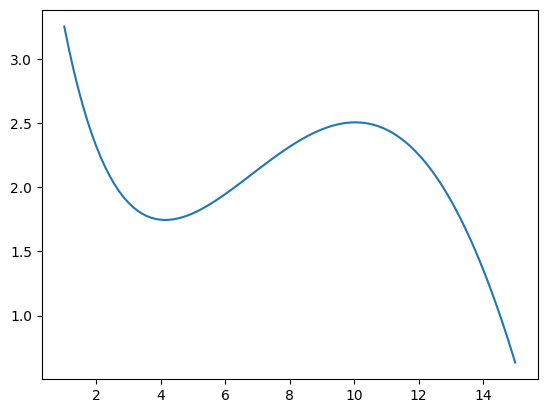

In [86]:
plt.plot(x, y)

In [89]:
a, b = np.linalg.solve(
    [
        [1, 1],
        [15, 1]
    ],
    [f(1), f(15)])
y_approx_2 = a * x + b

In [92]:
a, b, c = np.linalg.solve(
    [
        [1, 1, 1],
        [64, 8, 1],
        [225, 15, 1]
    ],
    [f(1), f(8), f(15)]
)
y_approx_3 = a * x**2 + b * x + c

In [103]:
a, b, c, d = np.linalg.solve(
    [
        [1, 1, 1, 1],
        [4**3, 4**2, 4, 1],
        [10**3, 10**2, 10, 1],
        [15**3, 15**2, 15, 1]
    ],
    [f(1), f(4), f(10), f(15)]
)
y_approx_4 = a * x**3 + b * x**2 + c * x + d

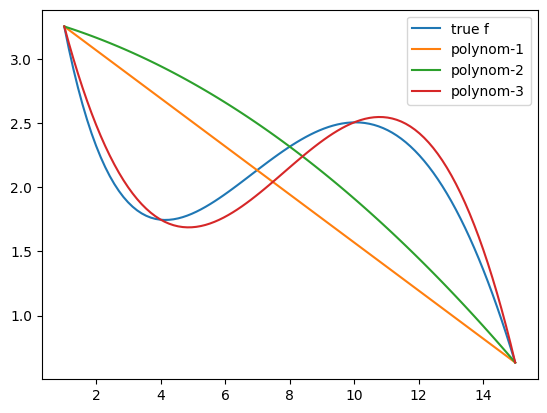

In [104]:
plt.plot(x, y, label='true f')
plt.plot(x, y_approx_2, label='polynom-1')
plt.plot(x, y_approx_3, label='polynom-2')
plt.plot(x, y_approx_4, label='polynom-3')
plt.legend()